# Interpolation vs Extrapolation

## Interpolation

การประมาณค่าในช่วง

Data:= <span style="color:Orange">{Monday, Tuesday</span>, Wednesday, <span style="color:Orange">Thursday, Friday, Saturday, Sunday 
}</span>

## Extrapolation

การประมาณค่านอกช่วง

Data:= <span style="color:Orange">{Monday, Tuesday, Wednesday,Thursday, Friday, Saturday</span>,  Sunday 
<span style="color:Orange">}</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
# --- Generate sample data ---
x = np.linspace(0, 10, 11)  # known data points
y = np.sin(x) + 0.1 * np.random.randn(len(x))  # noisy sine wave

In [3]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [4]:
y

array([-0.17767935,  0.9515866 ,  0.96936427, -0.05177939, -0.64966172,
       -0.8822992 , -0.24433967,  0.53120285,  0.83112456,  0.41640987,
       -0.50696642])

In [5]:
# --- Interpolation function ---
f_linear = interp1d(x, y, kind='linear')   # linear interpolation
f_cubic = interp1d(x, y, kind='cubic')     # cubic interpolation

In [6]:
# --- Range for testing ---
x_interp = np.linspace(0, 10, 201)  # inside known data
x_extrap = np.linspace(-2, 12, 300) # outside + inside

In [7]:
# --- Evaluate ---
y_interp_linear = f_linear(x_interp)
y_interp_cubic = f_cubic(x_interp)

# Extrapolation (scipy allows if fill_value="extrapolate")
f_extrap = interp1d(x, y, kind='cubic', fill_value="extrapolate")
y_extrap = f_extrap(x_extrap)

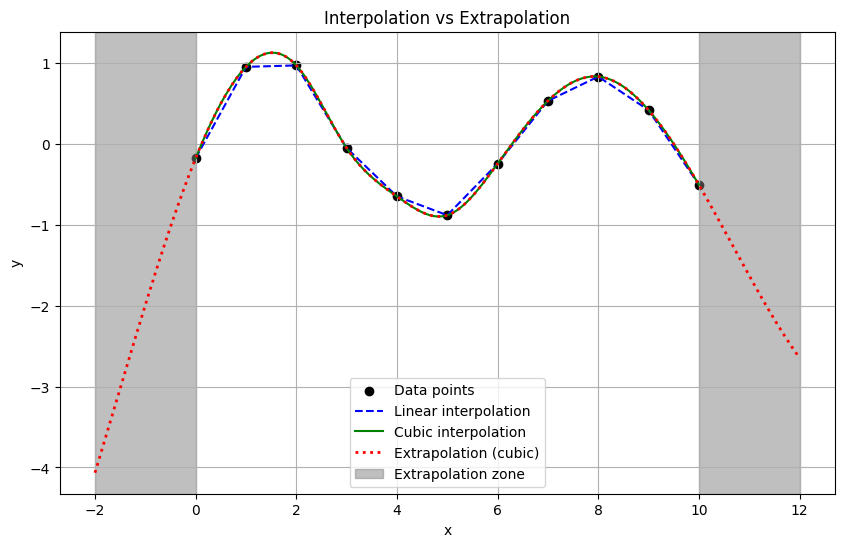

In [8]:
# --- Plot ---
plt.figure(figsize=(10, 6))

# Original data
plt.scatter(x, y, color="black", label="Data points")

# Interpolation
plt.plot(x_interp, y_interp_linear, 'b--', label="Linear interpolation")
plt.plot(x_interp, y_interp_cubic, 'g-', label="Cubic interpolation")

# Extrapolation
plt.plot(x_extrap, y_extrap, 'r:', linewidth=2, label="Extrapolation (cubic)")

plt.axvspan(-2, 0, color="gray", alpha=0.5, label="Extrapolation zone")
plt.axvspan(10, 12, color="gray", alpha=0.5)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolation vs Extrapolation")
plt.grid(True)
plt.show()